##### 1. Dates (사건일자)
: timestamp of the crime incident
##### 2. Category (범죄유형 - 종속변수)
: category of the crime incident (only in train.csv). This is the target variable you are going to predict.
##### 3. Descript (범죄 세부정보)
: detailed description of the crime incident (only in train.csv)
##### 4. DayOfWeek (요일)
: the day of the week
##### 5. PdDistrict (관할서)
: name of the Police Department District
##### 6. Resolution (처벌결과)
: how the crime incident was resolved (only in train.csv)
##### 7. Address (사건현장 대략적 주소)
: the approximate street address of the crime incident 
##### 8. X (경도)
:Longitude
##### 9. Y (위도)
: Latitude

In [2]:
df = pd.read_csv("train.csv", parse_dates=['Dates'])
# 연,월,주차,시간(1시간단위)
df['year'] = df['Dates'].map(lambda x: x.year)
df['month'] = df['Dates'].map(lambda x: x.month)
df['week'] = df['Dates'].map(lambda x: x.week)
df['hour'] = df['Dates'].map(lambda x: x.hour)
df.tail()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,week,hour
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,2,0
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,2,0
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,2,0
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,2,0
878048,2003-01-06 00:01:00,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Monday,BAYVIEW,NONE,1800 Block of NEWCOMB AV,-122.394926,37.738212,2003,1,2,0


In [4]:
for i in df.columns:
    print(i, "\n", df[i].unique(), len(df[i].unique()))

Dates 
 ['2015-05-13T23:53:00.000000000' '2015-05-13T23:33:00.000000000'
 '2015-05-13T23:30:00.000000000' ..., '2003-01-06T00:20:00.000000000'
 '2003-01-06T00:15:00.000000000' '2003-01-06T00:01:00.000000000'] 389257
Category 
 ['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT'] 39
Descript 
 ['WARRANT ARREST' 'TRAFFIC VIOLATION ARREST' 'GRAND THEFT FROM LOCKED AUTO'
 'GRAND THEFT FROM UNLOCKED AUTO' 'STOLEN AUTOMOBILE'
 'PETTY THEFT FROM LOCKED 

Address 
 ['OAK ST / LAGUNA ST' 'VANNESS AV / GREENWICH ST'
 '1500 Block of LOMBARD ST' ..., '300 Block of JOHN F KENNEDY DR'
 'FOLSOM ST / ZENO PL' '1000 Block of 22ND AV'] 23228
X 
 [-122.42589168 -122.42436302 -122.42699533 ..., -122.48124622 -122.41850208
 -122.39492572] 34243
Y 
 [ 37.7745986   37.80041432  37.80087263 ...,  37.77644744  37.73394539
  37.73821154] 34243
year 
 [2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003] 13
month 
 [ 5  4  3  2  1 12 11 10  9  8  7  6] 12
week 
 [20 18 16 14 12 10  8  6  4  2 52 50 48 46 44 42 40 38 36 34 32 30 28 26 24
 22] 26
hour 
 [23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0] 24


In [5]:
df['event'] = 1

In [59]:
df.year.value_counts()

2013    75606
2014    74766
2003    73902
2004    73422
2012    71731
2005    70779
2008    70174
2006    69909
2009    69000
2007    68015
2011    66619
2010    66542
2015    27584
Name: year, dtype: int64

2015년의 데이터가 현저하게 적다.

## 1 .시간에 따른 분석

##### 1) 연도별 범죄발생횟수

In [4]:
event_by_year = df[['year','event']].groupby('year').count().reset_index()

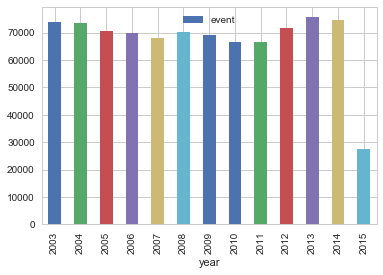

In [7]:
event_by_year.plot(kind='bar',x='year', y='event')

##### 1-2) 연도별 범죄유형별 범죄발생횟수

In [16]:
event_by_year_category = df[['year','Category','event']].groupby(['year','Category']).count().reset_index()

In [19]:
event_by_year_category_pivot = event_by_year_category.pivot(index="year", columns='Category', values='event').fillna(0)

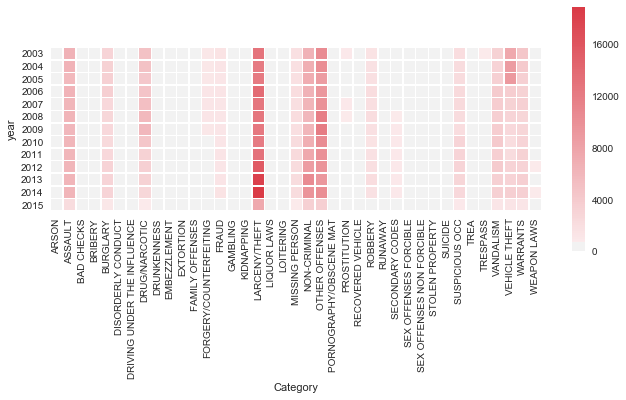

In [22]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(event_by_year_category_pivot, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

해를 거듭할수록 절도가 증가함.

NON-CRIMINAL은 형사상 책임을 묻지 않는 걸 말하는 건가...(대부분 정신치료)

##### 2) 시간대별 사건발생수

In [14]:
event_by_hour = df[['hour','event']].groupby(['hour']).sum().reset_index()

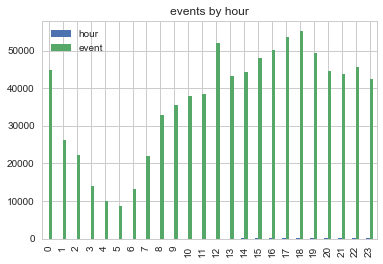

In [15]:
event_by_hour.plot(kind='bar', title="events by hour")

##### 2-1) 연도별 시간대별 사건발생수

In [27]:
event_by_year_hour = df[['year','hour','event']].groupby(['year','hour']).count().reset_index()

In [49]:
event_by_year_hour_pivot = event_by_year_hour.pivot(index='hour', columns='year', values='event')

In [50]:
event_by_year_hour_pivot

year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
hour,,,,,,,,,,,,,
0,3302,3337,3345,3653,3345,3831,3641,3609,3909,3966,4017,3620,1290
1,1952,1958,1938,2009,1976,2157,2138,2131,2176,2350,2435,2183,770
2,1773,1692,1655,1704,1747,1814,1989,1758,1842,1843,1917,1854,708
3,1106,1147,1085,1097,1068,1107,1126,1094,1062,1213,1207,1276,426
4,799,728,824,749,761,864,781,745,776,753,863,834,386
5,675,736,678,704,638,643,592,595,747,762,793,806,268
6,1005,1075,1081,944,1056,1057,1081,1070,1045,1078,1118,1097,426
7,1828,1972,1855,1790,1653,1850,1884,1666,1551,1649,1945,1752,653
8,2908,2863,3018,2816,2574,2506,2582,2411,2526,2553,2668,2593,882


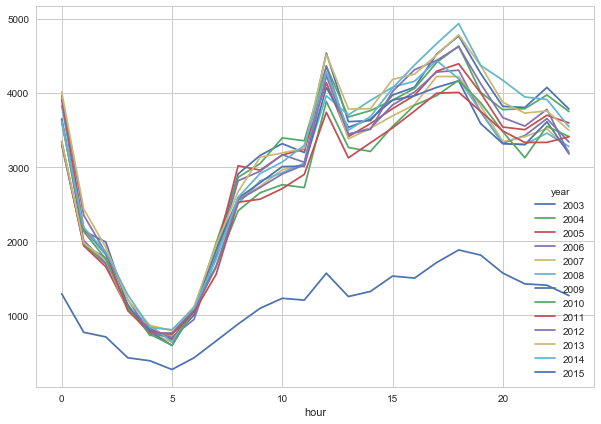

In [46]:
event_by_year_hour_pivot.plot(figsize=(10,7))

2015년을 제외한 2003~2014년까지 시간대별로 사건발생패턴이 유사하다.

##### 2-2) 연도별 월별 사건발생수

In [64]:
event_by_year_month = df[['year','month','event']].groupby(['year','month']).count().reset_index()

In [67]:
event_by_year_month_pivot = event_by_year_month.pivot(index='month', columns='year', values='event').fillna(method='ffill')

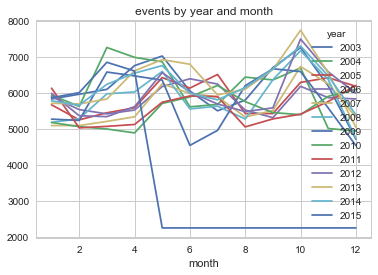

In [68]:
event_by_year_month_pivot.plot(title="events by year and month")

##### 2-3) 연도별 주차별 사건발생수

In [71]:
event_by_year_week = df[['year','week','event']].groupby(['year','week']).count().reset_index()

In [74]:
event_by_year_week_pivot = event_by_year_week.pivot(index='week', columns='year', values='event').fillna(method='ffill')

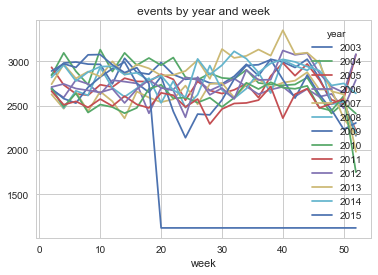

In [75]:
event_by_year_week_pivot.plot(title="events by year and week")

##### 3. 시간대별 범죄 발생수

In [3]:
crime = df.Category.unique()
crime

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING', 'SEX OFFENSES NON FORCIBLE',
       'EXTORTION', 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE',
       'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


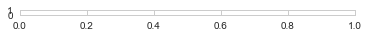

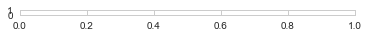

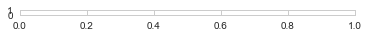

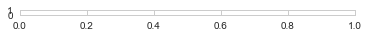

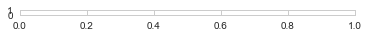

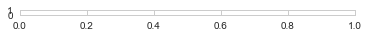

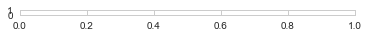

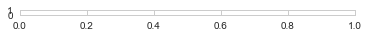

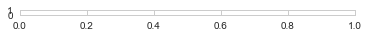

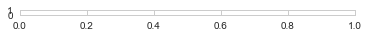

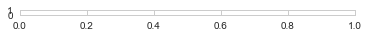

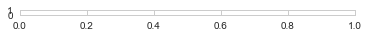

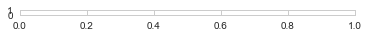

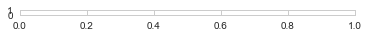

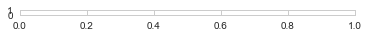

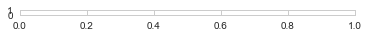

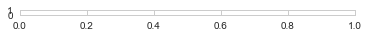

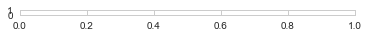

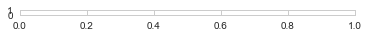

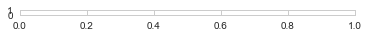

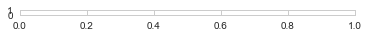

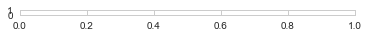

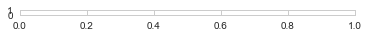

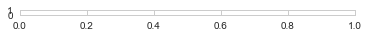

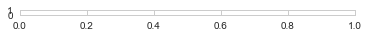

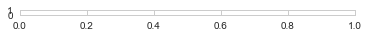

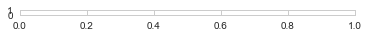

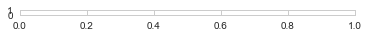

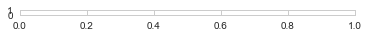

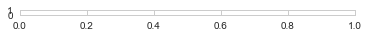

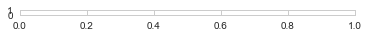

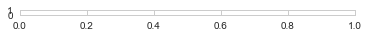

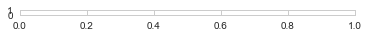

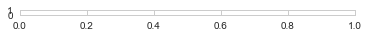

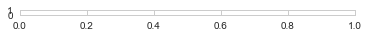

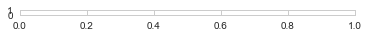

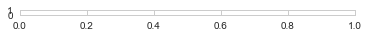

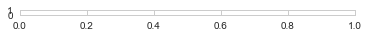

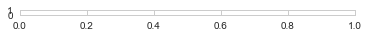

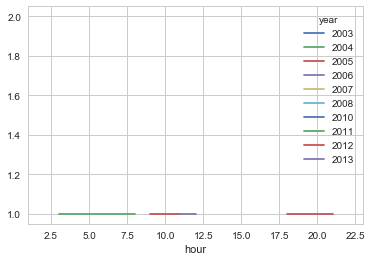

In [13]:
count = 1
for i in df.Category.unique():
    crime = df[df.Category == i]
    crime = crime[['year','hour','event']].groupby(['year','hour']).count().reset_index()
    crime_pivot = crime.pivot(index='hour', columns='year', values='event')
    plt.subplot(len(df.Category.unique()), 1, count)
    crime_pivot.plot()
    count += 1
plt.show()

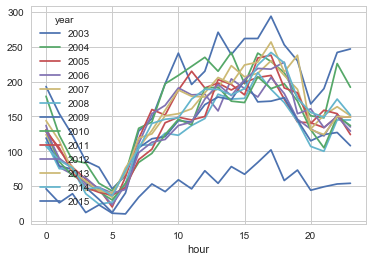

In [12]:
crime = df[df.Category == "WARRANTS"]
crime = crime[['year','hour','event']].groupby(['year','hour']).count().reset_index()
crime_pivot = crime.pivot(index='hour', columns='year', values='event')
crime_pivot.plot()

##### 4. 요일별 범죄수

In [52]:
dayofweek_event = df[['DayOfWeek','event']].groupby(['DayOfWeek']).count().reset_index()

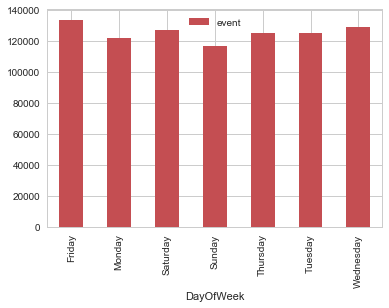

In [56]:
dayofweek_event.plot(x='DayOfWeek', y='event',kind='bar', color='r')

## 2. 장소별

##### 1) PdDistrict별 사건발생수

In [83]:
event_by_PdDistrict = df[['PdDistrict','event']].groupby('PdDistrict').count().reset_index()

In [87]:
event_by_PdDistrict.sort_values(by='event', ascending=False, inplace=True)

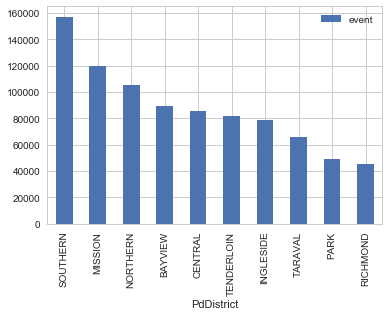

In [89]:
event_by_PdDistrict.plot(kind='bar', x='PdDistrict')

##### 2) Address별 사건발생수

In [67]:
event_by_address_pd = df[['PdDistrict','Address','event']].groupby(['PdDistrict','Address']).count().reset_index()
event_by_address_pd.sort_values(by='event', ascending=False)

,PdDistrict,Address,event
18569,SOUTHERN,800 Block of BRYANT ST,26533
18575,SOUTHERN,800 Block of MARKET ST,6581
9919,MISSION,2000 Block of MISSION ST,5090
9567,MISSION,1000 Block of POTRERO AV,4063
18607,SOUTHERN,900 Block of MARKET ST,3251
23746,TENDERLOIN,0 Block of TURK ST,3228
17898,SOUTHERN,0 Block of 6TH ST,2884
23797,TENDERLOIN,300 Block of ELLIS ST,2703
23808,TENDERLOIN,400 Block of ELLIS ST,2589
9733,MISSION,16TH ST / MISSION ST,2504


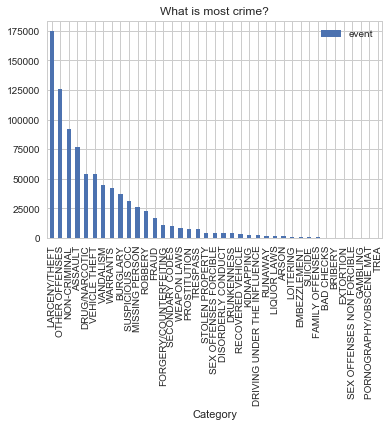

In [23]:
most_crime = df[['Category','event']].groupby("Category").sum().reset_index().sort_values(by="event", ascending=False)
most_crime.plot(kind='bar', x='Category', title="What is most crime?")

##### 각 범죄가 일어난 곳은 어느 곳일까? 어디서 제일 많이 일어날까?

In [16]:
crime_address = df[['Category','Address','event']].groupby(['Category','Address']).sum().reset_index()
crime_address.sort_values(by=['Category','event'], ascending=False, inplace=True)

In [26]:
len(crime_address[crime_address.Category == "LARCENY/THEFT"]), crime_address[crime_address.Category == "LARCENY/THEFT"]

(17535,             Category                                Address  event
 55937  LARCENY/THEFT                 800 Block of BRYANT ST   6144
 56053  LARCENY/THEFT                 800 Block of MARKET ST   3256
 47706  LARCENY/THEFT               100 Block of OFARRELL ST   1098
 53263  LARCENY/THEFT                  3200 Block of 20TH AV   1015
 55725  LARCENY/THEFT                 700 Block of MARKET ST    863
 51074  LARCENY/THEFT                2000 Block of MARKET ST    753
 46717  LARCENY/THEFT                   0 Block of PHELAN AV    697
 54823  LARCENY/THEFT           500 Block of JOHNFKENNEDY DR    690
 47750  LARCENY/THEFT                 100 Block of POWELL ST    666
 46739  LARCENY/THEFT                   0 Block of POWELL ST    634
 46667  LARCENY/THEFT                 0 Block of OFARRELL ST    624
 56324  LARCENY/THEFT                 900 Block of MARKET ST    611
 51568  LARCENY/THEFT                  2300 Block of 16TH ST    511
 48878  LARCENY/THEFT               1300 

#### 각 범죄별로 가장 많이 발생한 위치 5군데를 뽑아보자

In [35]:
for crime in crime_address.Category.unique():
    result = crime_address[crime_address.Category == crime]
    print("Crime: ",crime,"\t", "Address count: ",len(result),"\n" ,result.head(),"\n")

Crime:  WEAPON LAWS 	 Address count:  3565 
            Category                    Address  event
169473  WEAPON LAWS     800 Block of BRYANT ST    156
168393  WEAPON LAWS   2000 Block of MISSION ST     77
167176  WEAPON LAWS          0 Block of 6TH ST     44
167431  WEAPON LAWS         0 Block of TURK ST     42
169555  WEAPON LAWS  900 Block of ELLSWORTH ST     37 

Crime:  WARRANTS 	 Address count:  7836 
         Category                   Address  event
163882  WARRANTS    800 Block of BRYANT ST   1719
161754  WARRANTS  2000 Block of MISSION ST    567
163946  WARRANTS    800 Block of MARKET ST    477
159860  WARRANTS        0 Block of TURK ST    392
160343  WARRANTS  1000 Block of POTRERO AV    322 

Crime:  VEHICLE THEFT 	 Address count:  14588 
              Category                     Address  event
147669  VEHICLE THEFT  1500 Block of BAY SHORE BL    162
150974  VEHICLE THEFT    300 Block of OFARRELL ST    145
153595  VEHICLE THEFT      800 Block of BRYANT ST    128
152065  V

Crime:  LARCENY/THEFT 	 Address count:  17535 
             Category                   Address  event
55937  LARCENY/THEFT    800 Block of BRYANT ST   6144
56053  LARCENY/THEFT    800 Block of MARKET ST   3256
47706  LARCENY/THEFT  100 Block of OFARRELL ST   1098
53263  LARCENY/THEFT     3200 Block of 20TH AV   1015
55725  LARCENY/THEFT    700 Block of MARKET ST    863 

Crime:  KIDNAPPING 	 Address count:  1541 
          Category                       Address  event
45428  KIDNAPPING        800 Block of BRYANT ST     97
44240  KIDNAPPING             0 Block of 6TH ST     19
45179  KIDNAPPING         400 Block of ELLIS ST     13
44392  KIDNAPPING           100 Block of 6TH ST     12
44837  KIDNAPPING  200 Block of INTERSTATE80 HY     12 

Crime:  GAMBLING 	 Address count:  108 
        Category                   Address  event
44210  GAMBLING    700 Block of KEARNY ST      8
44134  GAMBLING   0 Block of JEFFERSON ST      4
44160  GAMBLING  1600 Block of QUESADA AV      4
44217  GAMBLI

1. 800 Block of BRYANT ST : 거의 모든 범죄가 일어남...범죄소굴
2. 각 범죄별로 상위 랭크된 Address에 block이 많이 들어간다. block유무로 binarize..?

#### Address에 block유무로 binarize

In [66]:
a = np.array([1 if 'Block' in i else 0 for i in df.Address.values])
a

array([0, 0, 0, ..., 0, 0, 1])

### Crime Visualization

In [70]:
event_by_crimeAddress = df[['Category','Address','X','Y','event']].groupby(['Category','Address','X','Y']).sum().reset_index()
event_by_crimeAddress

,Category,Address,X,Y,event
0,ARSON,0 Block of 12TH ST,-122.420001,37.774095,2
1,ARSON,0 Block of 14TH ST,-122.415102,37.768623,1
2,ARSON,0 Block of 3RD ST,-122.403285,37.787306,2
3,ARSON,0 Block of 4TH ST,-122.405583,37.785466,1
4,ARSON,0 Block of 6TH ST,-122.410042,37.781954,1
5,ARSON,0 Block of 6TH ST,-122.409504,37.781526,4
6,ARSON,0 Block of 6TH ST,-122.409420,37.781615,1
7,ARSON,0 Block of 6TH ST,-122.409011,37.781134,4
8,ARSON,0 Block of 9TH ST,-122.415065,37.776435,1
9,ARSON,0 Block of 9TH ST,-122.414953,37.776502,1


In [82]:
df[df.Y == event_by_crimeAddress.Y.max()]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,month,week,hour,event
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,52,17,1
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,52,0,1
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,52,0,1
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,52,0,1
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,48,11,1
667042,2005-11-28 16:04:00,TRESPASS,TRESPASSING,Monday,TENDERLOIN,"ARREST, BOOKED",ELLIS ST / 5THSTNORTH ST,-120.5,90.0,2005,11,48,16,1
669946,2005-11-14 09:20:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,BAYVIEW,"ARREST, BOOKED",YOSEMITE AV / WILLIAMS AV,-120.5,90.0,2005,11,46,9,1
671709,2005-11-02 20:30:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,CENTRAL,NONE,BRENHAM PL / WASHINGTON ST,-120.5,90.0,2005,11,44,20,1
673078,2005-10-23 20:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,NONE,AVENUE OF THE PALMS / GEARY BL,-120.5,90.0,2005,10,42,20,1
673114,2005-10-23 18:11:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,TARAVAL,"ARREST, BOOKED",STCHARLES AV / 19TH AV,-120.5,90.0,2005,10,42,18,1


뜬금없이 위도 90은 뭐냐...구글맵에 바다로 뜨는데ㅡㅡ